# LSTM Model Implementation in Python

### Source: https://github.com/endlessnoc/Project/blob/main/Stock%20Price%20Prediction%20Project/Stock%20Price%20Prediction%20Project%20Utilizing%20LSTM.ipynb 

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import warnings
warnings.filterwarnings('ignore')

In [2]:
Company = input("Stock Symbol: ")
Start_Date = input("Start(YYYY-MM-DD):")
End_Date = input("End(YYYY-MM-DD):")

Stock Symbol: AAPL
Start(YYYY-MM-DD):2010-01-01
End(YYYY-MM-DD):2023-05-15


In [3]:
Stock_Price = yf.download(Company,Start_Date,End_Date)
Stock_Price

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800
...,...,...,...,...,...,...
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.026688,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.301422,45326900
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.086533,53724500


In [4]:
Stock_Price = Stock_Price.reset_index()
Stock_Price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800
...,...,...,...,...,...,...,...
3358,2023-05-08,172.479996,173.850006,172.110001,173.500000,173.026688,55962800
3359,2023-05-09,173.050003,173.539993,171.600006,171.770004,171.301422,45326900
3360,2023-05-10,173.020004,174.029999,171.899994,173.559998,173.086533,53724500
3361,2023-05-11,173.850006,174.589996,172.169998,173.750000,173.276016,49514700


# Part A: Data Scrubbing

## Step A.1: Look at Each Column's Dtypes

In [5]:
Stock_Price.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### All Columns are Either Float or Integer Types

## Step A.2: Monitor Null Values

In [6]:
Stock_Price.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### No Null Values Exist

# Part B: Exploratory Data Analysis

## Step B.1: Stock Price

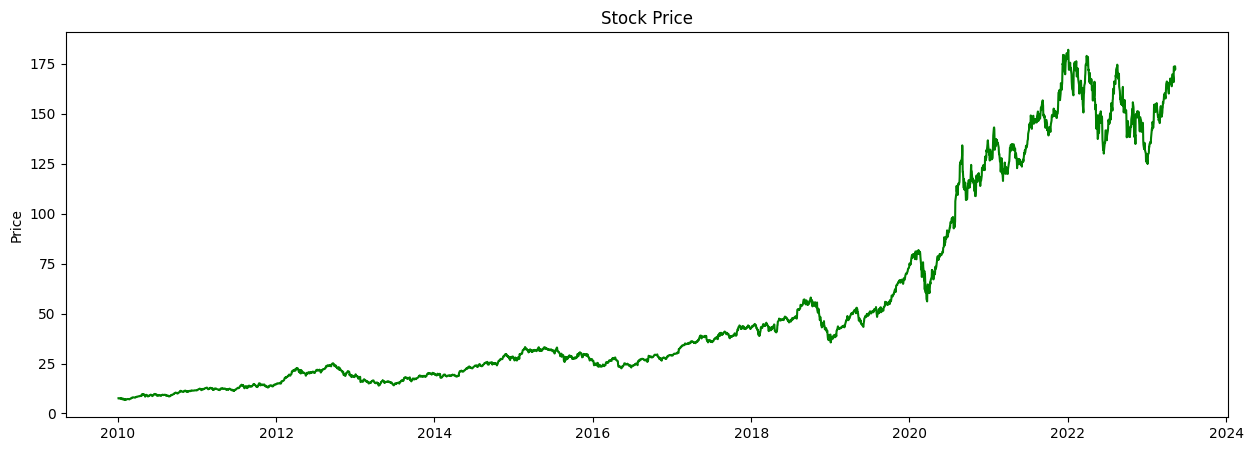

In [7]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(Stock_Price.Date,Stock_Price.Close, color='Green')

ax.set_ylabel('Price')
plt.title('Stock Price')

plt.show()

### The Stock Price is continuously changing.

## Step B.2: Moving Average

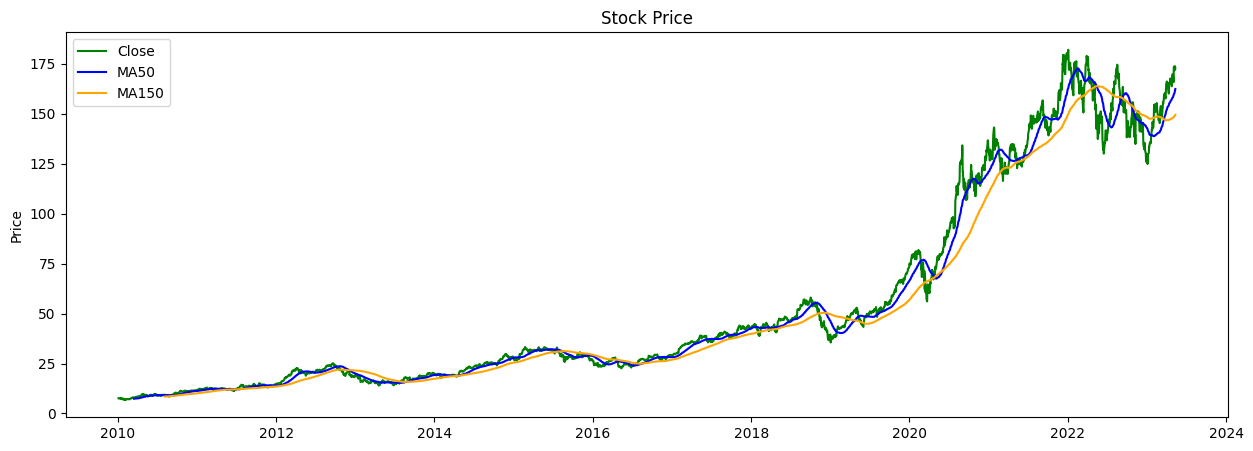

In [8]:
MA50 = Stock_Price.Close.rolling(50).mean()
MA150 = Stock_Price.Close.rolling(150).mean()

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(Stock_Price.Date,Stock_Price.Close, color='Green',label='Close')
ax.plot(Stock_Price.Date,MA50, color='Blue', label='MA50')
ax.plot(Stock_Price.Date,MA150, color='Orange', label = 'MA150')

ax.set_ylabel('Price')
plt.title('Stock Price')

plt.legend()
plt.show()

### By increasing the number to calculate moving averages, the smooother the Price trend gets.

## Step B.3: Volume

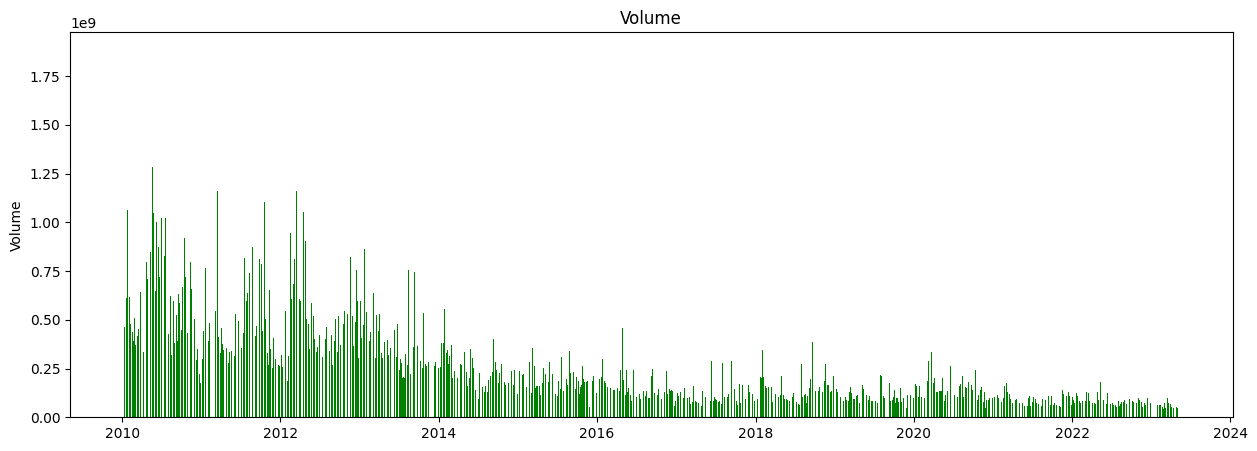

In [9]:
fig,ax = plt.subplots(figsize=(15,5))
ax.bar(Stock_Price.Date,Stock_Price.Volume, color='Green')

ax.set_ylabel('Volume')
plt.title('Volume')

plt.show()

### The Volume Chart is steadily changing, but not significantly.

## Step B.4: Daily Return

In [10]:
Stock_Price['Daily Return'] = Stock_Price['Close'].pct_change(1)
Stock_Price

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600,NaN
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800,0.001729
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000,-0.015906
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200,-0.001849
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800,0.006648
...,...,...,...,...,...,...,...,...
3358,2023-05-08,172.479996,173.850006,172.110001,173.500000,173.026688,55962800,-0.000403
3359,2023-05-09,173.050003,173.539993,171.600006,171.770004,171.301422,45326900,-0.009971
3360,2023-05-10,173.020004,174.029999,171.899994,173.559998,173.086533,53724500,0.010421
3361,2023-05-11,173.850006,174.589996,172.169998,173.750000,173.276016,49514700,0.001095


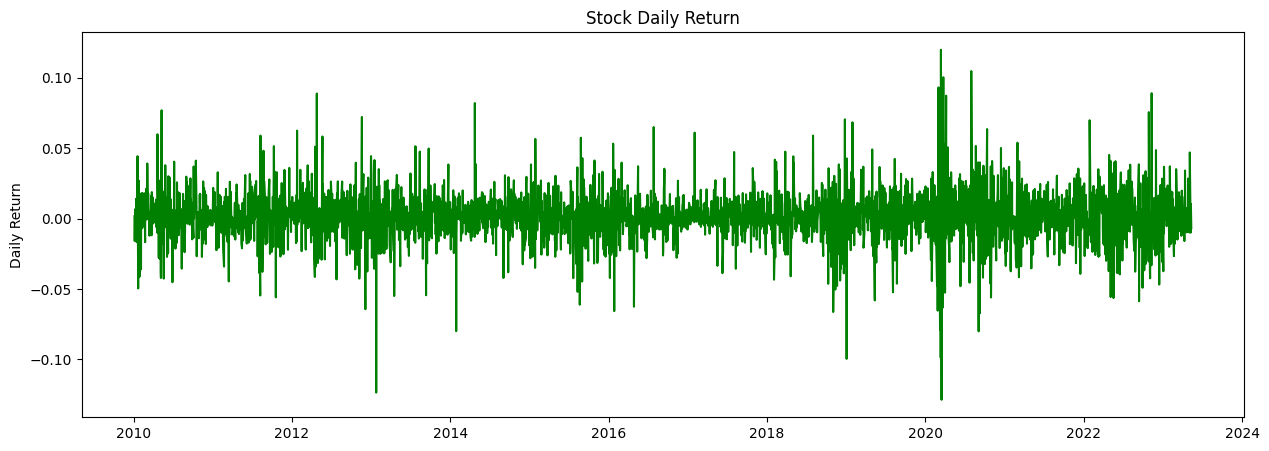

In [11]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(Stock_Price.Date,Stock_Price['Daily Return'], color='Green')

ax.set_ylabel('Daily Return')
plt.title('Stock Daily Return')

plt.show()

<Axes: >

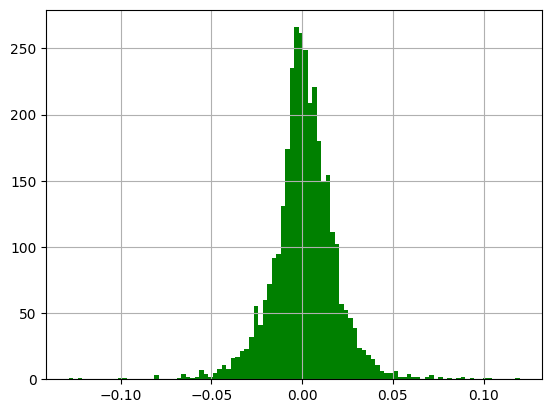

In [12]:
Stock_Price['Daily Return'].hist(bins=100,color='Green')

### The Daily Return isn't too big of a difference for a daily basis, but there are some dates that have definite outliers.

## Step B.5: Cumulative Return

In [13]:
Stock_Price['Cumulative Return'] = (1 + Stock_Price['Daily Return']).cumprod()
Stock_Price

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Cumulative Return
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600,NaN,NaN
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800,0.001729,1.001729
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000,-0.015906,0.985795
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200,-0.001849,0.983973
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800,0.006648,0.990514
...,...,...,...,...,...,...,...,...,...
3358,2023-05-08,172.479996,173.850006,172.110001,173.500000,173.026688,55962800,-0.000403,22.699874
3359,2023-05-09,173.050003,173.539993,171.600006,171.770004,171.301422,45326900,-0.009971,22.473530
3360,2023-05-10,173.020004,174.029999,171.899994,173.559998,173.086533,53724500,0.010421,22.707724
3361,2023-05-11,173.850006,174.589996,172.169998,173.750000,173.276016,49514700,0.001095,22.732583


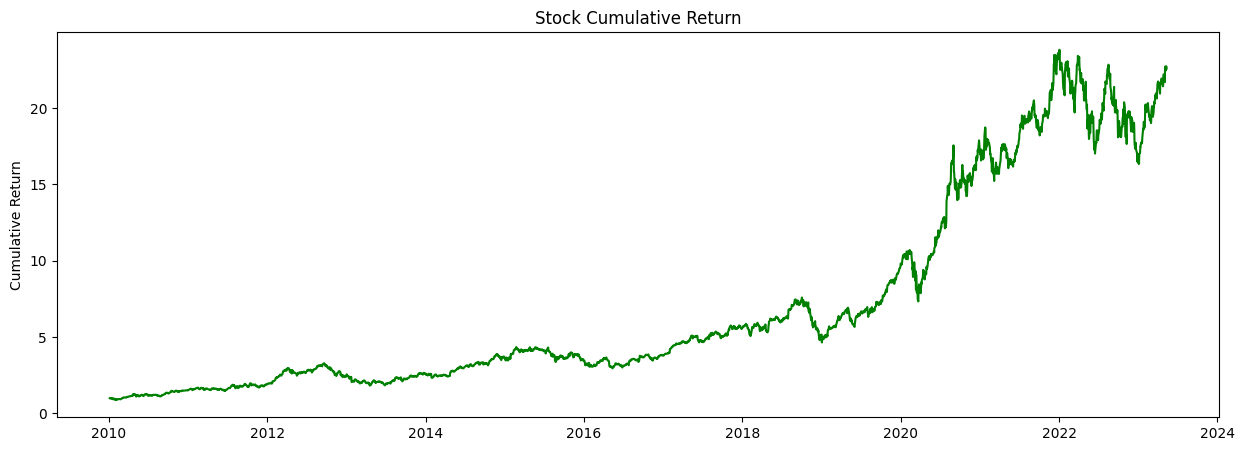

In [14]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(Stock_Price.Date,Stock_Price['Cumulative Return'], color='Green')

ax.set_ylabel('Cumulative Return')
plt.title('Stock Cumulative Return')

plt.show()

### The Cumulative Return is definitely showing a positive trend growth from 2010 to 2023.

# Part C: Machine Learning

## Part C.1: Split Dataset into Training and Validation Set

In [15]:
Stock_Price['Date'] = pd.to_datetime(Stock_Price['Date'])
Stock_Price.set_index('Date',inplace = True)
Close = Stock_Price.filter(['Close'])
CloseValue = Close.values
TrainingDataLength = math.ceil(len(CloseValue)*0.8)
TrainingDataLength

2691

### Out of 3363 rows, the training data has 2691 rows.

## Step C.2: Scaling Data

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
PriceData = scaler.fit_transform(CloseValue)
PriceData

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.95175595],
       [0.95284074],
       [0.94610374]])

### All the Stock Price is between the range of 0 and 1.

## Step C.3: Setting Training and Validation Sets

In [17]:
X_train = []
Y_train = []

Train_Data = PriceData[0:TrainingDataLength]

Backstep = 60
for i in range(Backstep,len(Train_Data)):
    X_train.append(Train_Data[i-Backstep:i,0])
    Y_train.append(Train_Data[i,0])
    if i <= Backstep:
        print("X_train:",X_train)
        print("Y_train:",Y_train)

X_train: [array([4.47776362e-03, 4.55321042e-03, 3.85789270e-03, 3.77836496e-03,
       4.06383392e-03, 3.68253530e-03, 3.19519517e-03, 3.79263868e-03,
       3.54387631e-03, 2.83020666e-03, 4.68778577e-03, 4.01286179e-03,
       3.26656105e-03, 1.16225866e-03, 2.24703686e-03, 2.83224576e-03,
       3.22782354e-03, 1.47627233e-03, 2.03638039e-06, 5.46463221e-04,
       7.76876395e-04, 1.46403771e-03, 0.00000000e+00, 6.95312283e-04,
       4.22080672e-04, 8.44166789e-04, 6.25985509e-04, 1.34985068e-03,
       1.69853181e-03, 2.31432725e-03, 2.14100896e-03, 2.21848942e-03,
       1.96156791e-03, 1.70668550e-03, 1.02156329e-03, 1.75562669e-03,
       2.02885830e-03, 2.56308963e-03, 3.45416123e-03, 3.42561379e-03,
       3.52348256e-03, 3.80487330e-03, 5.48505863e-03, 5.51156697e-03,
       6.31495443e-03, 6.68606025e-03, 6.82063559e-03, 7.04493690e-03,
       6.48215813e-03, 6.60653796e-03, 6.53925029e-03, 6.64732002e-03,
       6.15794623e-03, 6.66771105e-03, 7.40380811e-03, 7.60975477e-

In [18]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train.shape

(2631, 60, 1)

In [19]:
X_test = []
Y_test = []

Test_Data = PriceData[TrainingDataLength-Backstep:]

for i in range(Backstep,len(Test_Data)):
    X_test.append(Test_Data[i-Backstep:i,0])
    Y_test.append(Test_Data[i,0])
    if i <= Backstep:
        print("X_test:",X_test)
        print("Y_test:",Y_test)

X_test: [array([0.46267814, 0.46287799, 0.46000903, 0.47306917, 0.4840026 ,
       0.47476771, 0.48159039, 0.46558993, 0.47722274, 0.48153328,
       0.48054842, 0.48054842, 0.49445073, 0.49279501, 0.50518431,
       0.50752516, 0.50848146, 0.50595508, 0.51497588, 0.51878685,
       0.51192135, 0.51080803, 0.52239802, 0.51464757, 0.51620337,
       0.4909252 , 0.48961203, 0.50214407, 0.49325177, 0.50345724,
       0.51002301, 0.56751623, 0.58280303, 0.58695659, 0.58922605,
       0.61114996, 0.5952209 , 0.60444149, 0.58530087, 0.6060544 ,
       0.61747311, 0.6168879 , 0.61517507, 0.62062752, 0.62145535,
       0.63611416, 0.6709127 , 0.67940534, 0.67351042, 0.68320207,
       0.67456668, 0.67341054, 0.69757534, 0.72692143, 0.71104943,
       0.65098701, 0.65144377, 0.6049696 , 0.63066171, 0.60879486])]
Y_test: [0.600287932208091]


In [20]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test.shape

(672, 60, 1)

### Now, we have the Training Set and Validation Set available.

## Step C.4: LSTM Model Building, Compiling, and Training

In [21]:
Model = Sequential([
    LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)),
    (Dropout(0.2)),
    LSTM((50)),
    (Dropout(0.2)),
    (Dense(32)),
    (Dense(1))
])

Model.compile(optimizer = 'adam', loss = 'mean_squared_error')
Model.fit(X_train,Y_train,batch_size=32,epochs=10)
Model.summary()

Epoch 1/10
83/83 [==============================] - 11s 77ms/step - loss: 0.0017
Epoch 2/10
83/83 [==============================] - 6s 67ms/step - loss: 3.6907e-04
Epoch 3/10
83/83 [==============================] - 6s 76ms/step - loss: 3.4991e-04
Epoch 4/10
83/83 [==============================] - 6s 68ms/step - loss: 3.2057e-04
Epoch 5/10
83/83 [==============================] - 6s 77ms/step - loss: 2.3832e-04
Epoch 6/10
83/83 [==============================] - 5s 66ms/step - loss: 2.1992e-04
Epoch 7/10
83/83 [==============================] - 7s 86ms/step - loss: 2.5143e-04
Epoch 8/10
83/83 [==============================] - 6s 68ms/step - loss: 2.2872e-04
Epoch 9/10
83/83 [==============================] - 6s 77ms/step - loss: 2.0158e-04
Epoch 10/10
83/83 [==============================] - 6s 66ms/step - loss: 2.0486e-04
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LST

### Now, we have a model to run through the validation set.

## Step C.5: Calculate RMSE of the Model

In [22]:
Pred = Model.predict(X_test)
Pred2 = scaler.inverse_transform(Pred)

RMSE = np.sqrt(np.mean(Pred - Y_test)**2)
RMSE

21/21 [==============================] - 2s 28ms/step


0.015343753588094162

### Since RMSE is low, the model has great predictive performance.

## Step C.6: Visualization for Prediction Results

In [23]:
TrainingSet, ValidationSet  = Close[:TrainingDataLength], Close[TrainingDataLength:]
ValidationSet['Predictions'] = Pred2
ValidationSet

,Close,Predictions
Date,,
2020-09-11,112.000000,125.592827
2020-09-14,115.360001,123.704277
2020-09-15,115.540001,122.069756
2020-09-16,112.129997,120.716331
2020-09-17,110.339996,119.379066
...,...,...
2023-05-08,173.500000,171.541351
2023-05-09,171.770004,172.295990
2023-05-10,173.559998,173.000198


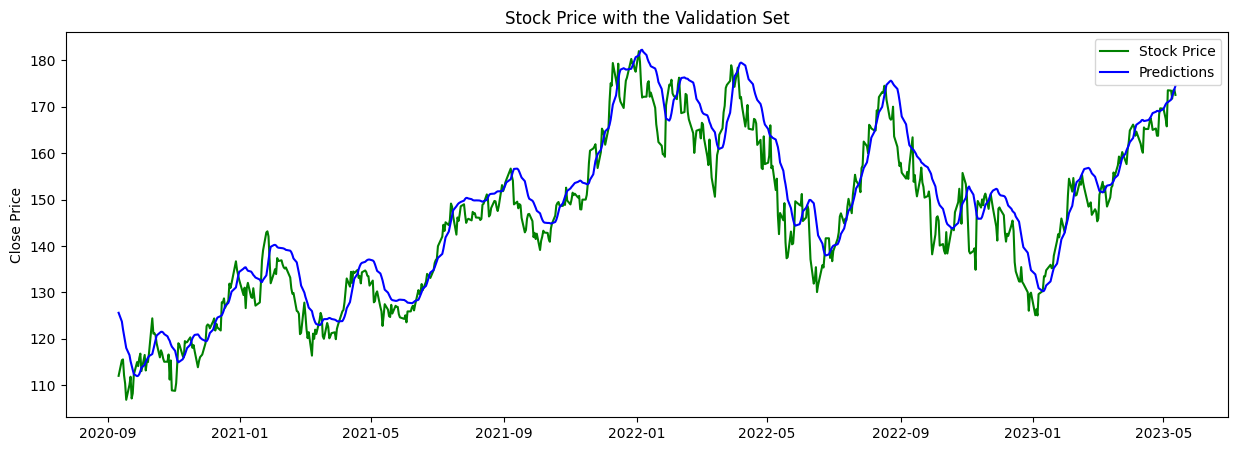

In [24]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(ValidationSet.Close, color='Green',label='Stock Price')
ax.plot(ValidationSet.Predictions, color='Blue', label='Predictions')

ax.set_ylabel('Close Price')
plt.title('Stock Price with the Validation Set')

plt.legend()
plt.show()

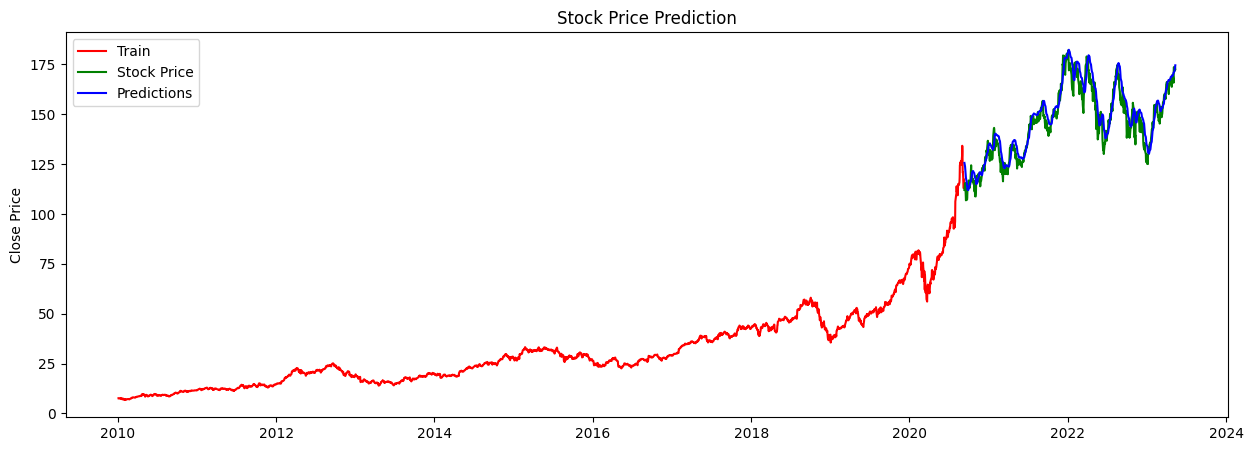

In [25]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(TrainingSet.Close, color='Red',label='Train')
ax.plot(ValidationSet.Close, color='Green',label='Stock Price')
ax.plot(ValidationSet.Predictions, color='Blue', label='Predictions')

ax.set_ylabel('Close Price')
plt.title('Stock Price Prediction')

plt.legend()
plt.show()

### As seen, the stock price prediction may not be as accurate as the RMSE entails. Thus, other machine learning algorithm has to be explored.

### This project is the preliminary understanding of utilizing LSTM Models.